In [115]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
real_estate_df = pd.read_csv("Sheet1.csv")
real_estate_df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [117]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 200 non-null    object 
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [118]:
# Cleaning steps
# 1. SrNo - Remove
# 2. Location - Remove
# 3. Sub-Area - Standardise it - all values in lower case - LabelEncoding
# 4. Property-Type - Remove all string, Replace BHK,  Extract the top 1 character
# 5. Price in lakhs - Convert to float
# 6. Price in Millions - Remove as its dependent on "Price in lakhs"
# 7. TownShip Name/ Society Name  - all values in lower case
# 8. Total TownShip Area in Acres - remove
# 8. Clubhouse and following columns to bool

In [119]:
real_estate_df.columns

Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

In [120]:
real_estate_df = real_estate_df.drop(columns=["Sr. No.",
                                              "Location", "Price in Millions",
                                             "Total TownShip Area in Acres",
                                             ])
real_estate_df

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,Bavdhan,1 BHK,492,39,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Bavdhan,2 BHK,774,65,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Bavdhan,3 BHK,889,74,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Bavdhan,3 BHK Grand,1018,89,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,Mahalunge,2BHK,743,74,Godrej Properties,Godrej Hills retreat,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,BANER,3bhk,1300 to 1400,160,SUPREME,SUPREME ESTIA,yes,no,no,no,yes,yes,yes
196,BANER,4bhk,1600 +,230,SUPREME,SUPREME ESTIA,yes,no,no,no,yes,yes,yes
197,BANER,2 bhk,769 to 809,95,Tejraaj Group,TEJ ELEVIA,no,no,no,no,yes,yes,yes
198,BANER,3 bhk,1101 to 1113,135,Tejraaj Group,TEJ ELEVIA,no,no,no,no,yes,yes,yes


In [121]:
# Convert categorical columns to string and lowercase
list_of_cols = ['Sub-Area',
                'Company Name', 'TownShip Name/ Society Name',
                'ClubHouse', 'Propert Type', 
                'School / University in Township ', 
                'Hospital in TownShip',
                'Mall in TownShip', 'Park / Jogging track', 
                'Swimming Pool', 'Gym']

for col in list_of_cols:
    real_estate_df[col] = real_estate_df[col].apply(lambda x: x.strip().lower())

In [122]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sub-Area                          200 non-null    object
 1   Propert Type                      200 non-null    object
 2   Property Area in Sq. Ft.          200 non-null    object
 3   Price in lakhs                    200 non-null    object
 4   Company Name                      200 non-null    object
 5   TownShip Name/ Society Name       200 non-null    object
 6   ClubHouse                         200 non-null    object
 7   School / University in Township   200 non-null    object
 8   Hospital in TownShip              200 non-null    object
 9   Mall in TownShip                  200 non-null    object
 10  Park / Jogging track              200 non-null    object
 11  Swimming Pool                     200 non-null    object
 12  Gym                   

In [110]:
real_estate_df.head()

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,bavdhan,1 BHK,492,39,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2 BHK,774,65,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3 BHK,889,74,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3 BHK Grand,1018,89,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2BHK,743,74,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [123]:
# Convert to lowercase and replace with np.nan
real_estate_df["Price in lakhs"] = real_estate_df["Price in lakhs"].apply(lambda x: x.strip().lower()).replace("null", np.nan)
real_estate_df["Price in lakhs"] = real_estate_df["Price in lakhs"].astype("float")
real_estate_df = real_estate_df.dropna(subset=["Price in lakhs"])

In [124]:
real_estate_df["Price in lakhs"].unique()

array([ 39.  ,  65.  ,  74.  ,  89.  ,  95.  ,  75.  , 100.  ,  88.  ,
       135.  , 188.  ,  58.  ,  40.  ,  78.  ,  36.  ,  48.  ,  57.  ,
        79.  ,  37.  ,  59.  ,  61.  ,  63.  ,  73.  ,  76.  ,  80.  ,
        96.  ,  70.  ,  90.  ,  97.  , 120.  ,  42.  ,  14.  ,  22.  ,
        26.  ,  83.  , 101.  , 103.  , 128.  , 163.  ,  54.  ,  51.  ,
        60.  ,  66.  ,  45.5 ,  72.5 ,  73.5 ,  62.  ,  84.  ,  54.14,
        58.32,  69.38,  75.03,  79.02,  82.1 , 249.  , 460.  ,  45.75,
        49.34,  49.74,  50.56, 923.  , 930.  ,  55.  ,  65.5 ,  68.  ,
        92.  ,  33.5 ,  47.3 ,  55.22, 136.  , 143.  ,  47.59,  47.7 ,
        47.8 ,  47.91,  48.02, 161.  , 170.  , 178.  , 187.  , 211.  ,
       213.  ,  85.  , 129.  , 133.  , 139.  , 140.  ,  43.2 ,  47.4 ,
        30.58,  43.49,  43.83,  44.44,  45.52, 111.  , 118.  , 121.  ,
       162.  , 167.  ,  52.  ,  68.06,  68.41,  98.87, 177.  ,  68.8 ,
       130.  ,  56.  , 110.  , 146.  , 147.  , 149.  ,  38.68,  60.72,
      

In [125]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sub-Area                          199 non-null    object 
 1   Propert Type                      199 non-null    object 
 2   Property Area in Sq. Ft.          199 non-null    object 
 3   Price in lakhs                    199 non-null    float64
 4   Company Name                      199 non-null    object 
 5   TownShip Name/ Society Name       199 non-null    object 
 6   ClubHouse                         199 non-null    object 
 7   School / University in Township   199 non-null    object 
 8   Hospital in TownShip              199 non-null    object 
 9   Mall in TownShip                  199 non-null    object 
 10  Park / Jogging track              199 non-null    object 
 11  Swimming Pool                     199 non-null    object 
 12  Gym     

In [126]:
# Remove values with shop
real_estate_df = real_estate_df[real_estate_df["Propert Type"] != "shop"]

In [130]:
# Replacing the bhk and then using [0] index value
real_estate_df["Propert Type"] = real_estate_df["Propert Type"].str[0]
# Convert to int
real_estate_df["Propert Type"] = real_estate_df["Propert Type"].astype("int")

In [131]:
real_estate_df["Propert Type"].unique()

array([1, 2, 3, 4, 5, 6])

In [133]:
# Removing values beyond " "
# Remove characters
real_estate_df["Property Area in Sq. Ft."] = real_estate_df["Property Area in Sq. Ft."].str.split().str[0]
real_estate_df["Property Area in Sq. Ft."] = real_estate_df["Property Area in Sq. Ft."].str.replace(r"[,;@#?!&$+]+\ *", "", regex=True)
real_estate_df["Property Area in Sq. Ft."] = real_estate_df["Property Area in Sq. Ft."].astype("int")

In [134]:
real_estate_df["Property Area in Sq. Ft."].unique()

array([ 492,  774,  889, 1018,  743,  975,  877, 1077,  905, 1125, 1644,
       2220,  662,  890,  423,  665,  792,  462,  666,  750, 1030,  446,
        796,  842,  865,  902, 1154,  872,  934, 1088, 1109, 1163, 1419,
       1485,  684,  990,  882, 1103,  543,  801,  320,  473,  581,  790,
        820,  989, 1003, 1182, 1579,  491,  659,  732,  809,  460,  734,
        753,  675,  917,  670,  740,  847,  936, 1032, 1698, 2267,  725,
        731,  744,  923,  930, 1180,  860,  988, 1093,  456,  644,  785,
       1060,  113,  664,  673,  682,  698, 1239, 1315, 1388, 1463, 1671,
       1687,  575,  751,  761,  871, 1166, 1206, 1272, 1279,  646,  717,
        436,  637,  642,  655,  668,  810,  735,  783,  805, 1074, 1111,
        535,  947,  697,  711,  980, 1400, 1772, 1662,  705,  726,  793,
        904, 1168, 1189,  479,  693,  808, 1086,  844,  873,  606,  611,
        626,  691,  835,  854,  715,  624,  968,  996, 1038,  489,  598,
        616,  692,  867,  908, 1624, 2043,  727,  5

In [136]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sub-Area                          198 non-null    object 
 1   Propert Type                      198 non-null    int64  
 2   Property Area in Sq. Ft.          198 non-null    int64  
 3   Price in lakhs                    198 non-null    float64
 4   Company Name                      198 non-null    object 
 5   TownShip Name/ Society Name       198 non-null    object 
 6   ClubHouse                         198 non-null    object 
 7   School / University in Township   198 non-null    object 
 8   Hospital in TownShip              198 non-null    object 
 9   Mall in TownShip                  198 non-null    object 
 10  Park / Jogging track              198 non-null    object 
 11  Swimming Pool                     198 non-null    object 
 12  Gym     

In [135]:
real_estate_df.head()

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,bavdhan,1,492,39.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2,774,65.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3,889,74.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3,1018,89.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2,743,74.0,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [137]:
# EDA

<Axes: >

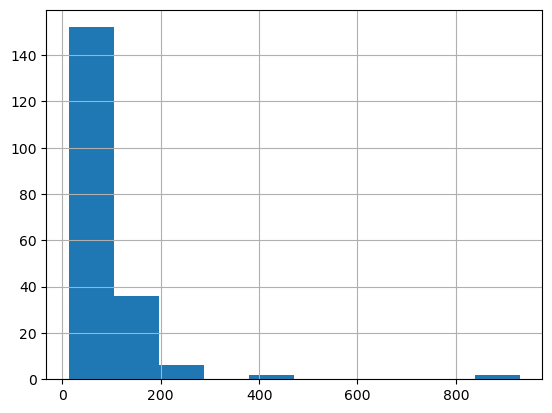

In [138]:
# Univariate
# Price
real_estate_df["Price in lakhs"].hist()

<Axes: >

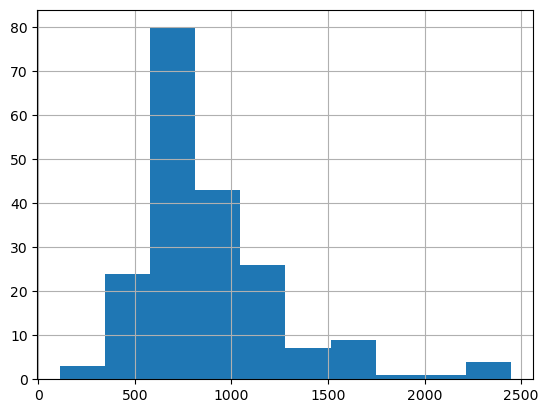

In [140]:
real_estate_df["Property Area in Sq. Ft."].hist()

In [ ]:
# Bivariate

<Axes: xlabel='Price in lakhs', ylabel='Property Area in Sq. Ft.'>

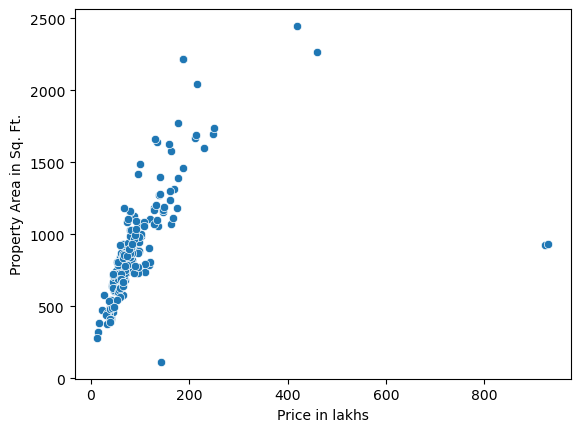

In [145]:
sns.scatterplot(data=real_estate_df, x="Price in lakhs", y="Property Area in Sq. Ft.")

<Axes: xlabel='Propert Type', ylabel='Price in lakhs'>

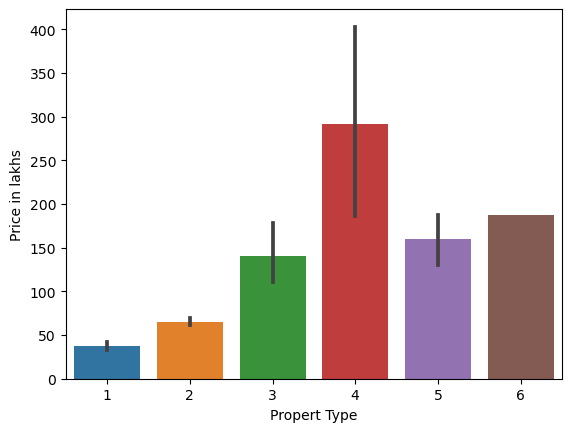

In [149]:
sns.barplot(x="Propert Type", y="Price in lakhs", data = real_estate_df)

<Axes: xlabel='Price in lakhs', ylabel='Sub-Area'>

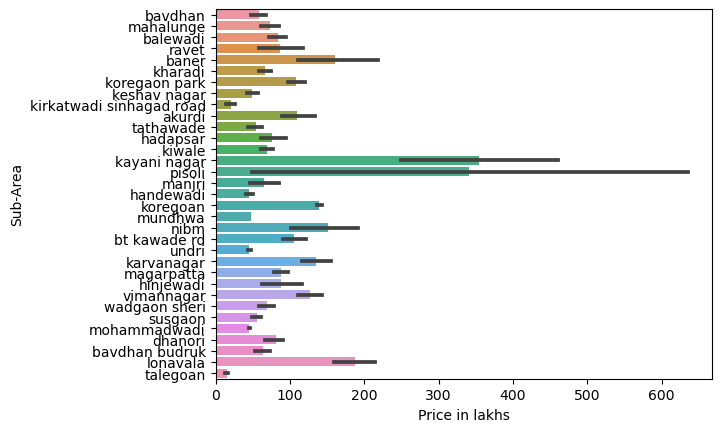

In [142]:
sns.barplot(y="Sub-Area", x="Price in lakhs", data = real_estate_df)

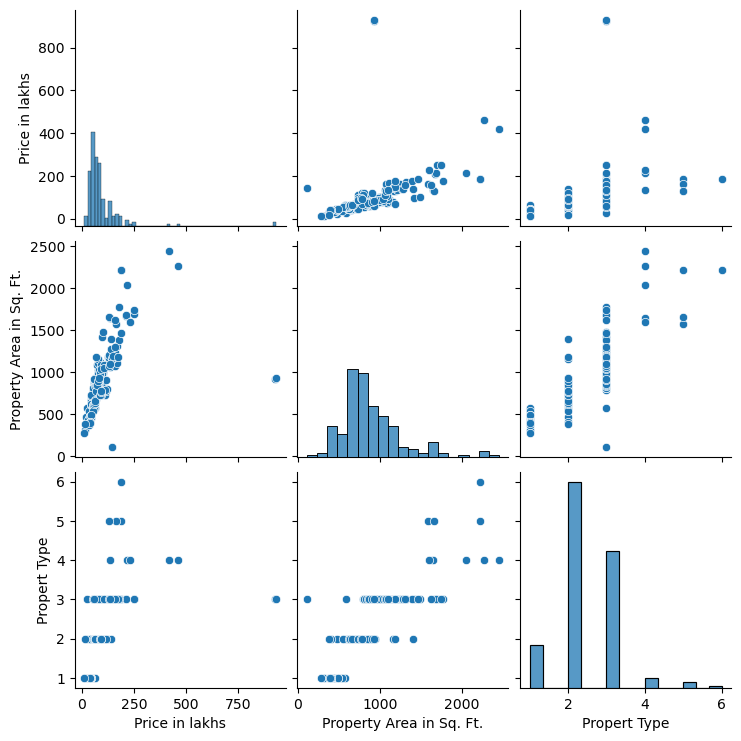

In [147]:
# Multivariate
sns.pairplot(real_estate_df[["Price in lakhs", "Property Area in Sq. Ft.", "Propert Type"]])

/var/folders/v3/pbt11cgx48b92xhbwckg3qsr0000gn/T/ipykernel_4238/834034405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = real_estate_df.corr()


<Axes: >

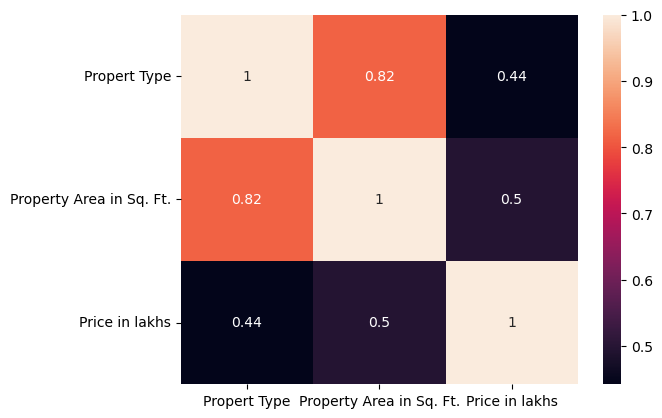

In [151]:
corr_data = real_estate_df.corr()
sns.heatmap(corr_data, annot=True)

In [152]:
real_estate_df.to_csv("eda_cleaned.csv", index=False)

In [14]:
# Preprocessing for ML model
# import the required libraries
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
data = pd.read_csv("eda_cleaned.csv")
data.head()

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,bavdhan,1,492,39.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2,774,65.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3,889,74.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3,1018,89.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2,743,74.0,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [8]:
data.columns=[ "sub_area", "n_bhk", "surface", "price_lkhs", 
              "company_name", "township", "club_house", 
              "school", "hospital", "mall", "park", "pool", "gym"]

In [9]:
data.head()

,sub_area,n_bhk,surface,price_lkhs,company_name,township,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1,492,39.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2,774,65.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3,889,74.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3,1018,89.0,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2,743,74.0,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [10]:
# drop the columns
data = data.drop(columns=["company_name", "township"]).drop_duplicates()

In [12]:
# Selecting the binary columns
binary_cols = data.iloc[:, 4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [15]:
laben = LabelEncoder()
for col in binary_cols:
    data[col] = laben.fit_transform(data[col])

In [16]:
data.head()

,sub_area,n_bhk,surface,price_lkhs,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1,492,39.0,1,1,1,1,1,1,1
1,bavdhan,2,774,65.0,1,1,1,1,1,1,1
2,bavdhan,3,889,74.0,1,1,1,1,1,1,1
3,bavdhan,3,1018,89.0,1,1,1,1,1,1,1
4,mahalunge,2,743,74.0,1,1,1,1,1,1,1


In [17]:
data["sub_area"].nunique()

33

In [30]:
data_grp_sb = data.groupby("sub_area")["price_lkhs"].count()\
                                    .reset_index()\
                                    .sort_values("price_lkhs", ascending=False)

list_for_fe_sub_area = data_grp_sb[data_grp_sb["price_lkhs"] > 7]["sub_area"].tolist()
data_grp_sb.head()

,sub_area,price_lkhs
13,kharadi,16
2,baner,12
26,ravet,12
8,handewadi,11
3,bavdhan,10


In [31]:
data["sub_area"] = data["sub_area"].where(data["sub_area"].isin(list_for_fe_sub_area), "other")
data.head()

,sub_area,n_bhk,surface,price_lkhs,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1,492,39.0,1,1,1,1,1,1,1
1,bavdhan,2,774,65.0,1,1,1,1,1,1,1
2,bavdhan,3,889,74.0,1,1,1,1,1,1,1
3,bavdhan,3,1018,89.0,1,1,1,1,1,1,1
4,mahalunge,2,743,74.0,1,1,1,1,1,1,1


In [32]:
# Dummy variable conversion
hoten = OneHotEncoder(sparse=False)
X_dummy = hoten.fit_transform(data[["sub_area"]])
X_dummy.shape, X_dummy, X_dummy.dtype

# Type conversion
X_dummy = X_dummy.astype("int64")

/Users/brijrajsinhgohil/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
data.loc[:,sa_cols_name] = X_dummy
data.head()

/var/folders/v3/pbt11cgx48b92xhbwckg3qsr0000gn/T/ipykernel_4434/1660314143.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,sa_cols_name] = X_dummy


,sub_area,n_bhk,surface,price_lkhs,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1,492,39.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2,774,65.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3,889,74.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3,1018,89.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2,743,74.0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# Sub_area and dummy columns relationship 
data[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
data.head()

,sub_area,n_bhk,surface,price_lkhs,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1,492,39.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2,774,65.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3,889,74.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3,1018,89.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2,743,74.0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# Standard scaling for surface
sc = StandardScaler(with_std=True, with_mean=True)
data["surface"] = sc.fit_transform(data[["surface"]])

In [37]:
data.head()

,sub_area,n_bhk,surface,price_lkhs,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1,-1.062091,39.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2,-0.305898,65.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3,0.002478,74.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3,0.348397,89.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2,-0.389026,74.0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
data.drop(columns=["sub_area"], inplace=True)

In [40]:
data.to_csv("preprocessed.csv", index=False)

In [52]:
# Selecting the feature matrix and target vector
y = data["price_lkhs"]
X = data.drop(columns=["price_lkhs"])



In [53]:
# Random sate for data splitting
rs = 118
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=rs) 

In [54]:
def gridSearchReport(estimator, X, y, pg, cv=LeaveOneOut(), rs=118):
    t0 = time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=rs)
    
    est_cv = GridSearchCV(estimator, param_grid=pg, scoring="neg_mean_squared_error", cv=cv)
    est_cv.fit(X_train, y_train)
    
    print("Best parameters: ", est_cv.best_params_)
    print("Best CV scores: ", abs(est_cv.best_score_))
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test)
    print("MSE, R2 train", mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred))
    print("MSE, R2 test", mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred))
    
    t = round(time()-t0, 2)
    print("Elapse time", t, "s: ", round(t/60,2), "min")
    return est_cv

In [55]:
# Random forest regressor
rfr = RandomForestRegressor(random_state=10)
pg = {
    "n_estimators": [10], #[10, 20, 30, 50],
    "criterion": ["squared_error"], #["squared_error", "absolute_error", "poisson"],
    "max_depth": [2], #[2,3,4],
    "min_samples_split": [3, 4], #range(2, 10),
    "min_samples_leaf": [2,3],
    "max_features":range(4, X_train.shape[1]+1)
}

rfr_cv = gridSearchReport(rfr, X, y, pg, cv=5, rs=rs)

Best parameters:  {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}
Best CV scores:  1572.5336729874596
MSE, R2 train 1066.2284596626055 0.7140053140169884
MSE, R2 test 23737.22795040659 0.04590742827523164
Elapse time 4.3 s:  0.07 min


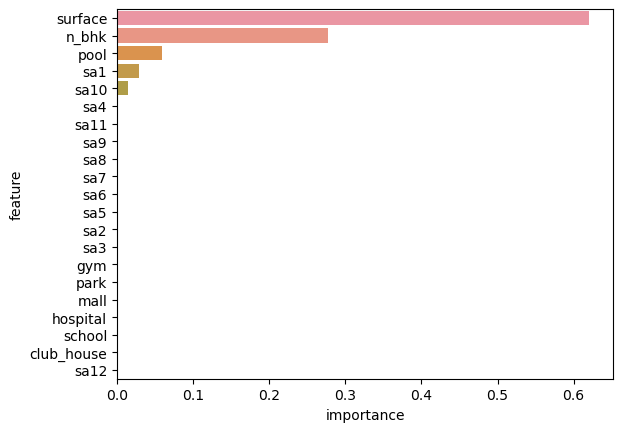

In [56]:
rfr = rfr_cv.best_estimator_
df_imp = pd.DataFrame(zip(rfr.feature_names_in_, rfr.feature_importances_))
df_imp.columns = ["feature", "importance"]
df_imp = df_imp.sort_values("importance", ascending=False).reset_index(drop=True)
sns.barplot(data=df_imp, x="importance", y="feature")
plt.show()

In [69]:
# define the parameters for XGBoost model
from scipy.stats import uniform
param_grid = {
    "max_depth": range(2,7),
    "gamma": uniform(loc=0.0, scale=3),
    "min_child_weight": range(3,6),
    "colsample_bytree": uniform(loc=0.1, scale=0.9),
    "subsample": uniform(loc=0.5, scale=0.5),
    "learning_rate": uniform(loc=0.01, scale=0.99)
}

In [70]:
from sklearn.model_selection import ParameterSampler
rng = np.random.RandomState(20)
n_iter = 500
param_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=rng))

In [71]:
param_list[0]

{'colsample_bytree': 0.6293177209695467,
 'gamma': 2.6931411837282537,
 'learning_rate': 0.8926154221799609,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 0.5179447928084266}

In [76]:
from sklearn.model_selection import KFold
def cross_validate(est, Xn, yn, n_fold=10):
    kf = KFold(n_splits=n_fold, shuffle=True, random_state=0)
    mean_train_error, mean_val_error = 0, 0
    for train_index, val_index in kf.split(Xn, yn):
        est.fit(Xn[train_index], yn[train_index], eval_set=[(Xn[train_index], yn[train_index]),(Xn[val_index], yn[val_index])], verbose=False)
        mean_val_error += mean_squared_error(yn[val_index], est.predict(Xn[val_index]))
        mean_train_error += mean_squared_error(yn[train_index], est.predict(Xn[train_index]))
    return mean_train_error/n_fold, mean_val_error/n_fold

In [1]:
# xgbr = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, verbosity=1, eval_metric="rmse", early_stopping_rounds=30)
# val_score, train_score = [], []
# counter = 0
# for param_grid in param_list:
#     xgbr.set_params(**param_grid)
#     train_error, val_error = cross_validate(xgbr, X_train.values, y_train.values)
#     val_score.append(val_error)
#     train_score.append(train_error)
    
#     if counter%50==0:
#         print("iter=", counter, "train_score=", train_score[counter], "val_score=", val_score[counter])
#     counter+=1